In [ ]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Understanding the Dataset**

In [ ]:
 
# Reading the csv data as a pandas DataFrame
link = "https://raw.githubusercontent.com/shubham5351/TSF-GRIP/master/Task-5/SampleSuperstore.csv"

df = pd.read_csv(link)

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Representing the feature names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
#Representing statistical data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Representing the datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Checking the null values 
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

17

In [ ]:
df.drop_duplicates( inplace = True )

In [ ]:
df.duplicated().sum()

0

**Visualisation**

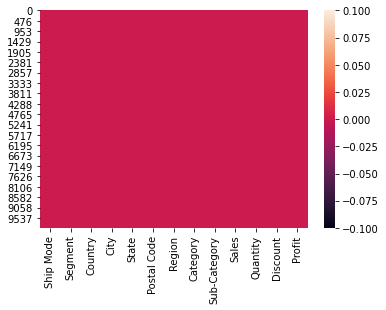

In [ ]:
sns.heatmap(df.isnull(), cbar = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


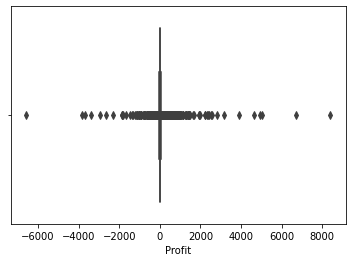

In [ ]:
sns.boxplot(df['Profit'])

In [ ]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
corr = df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


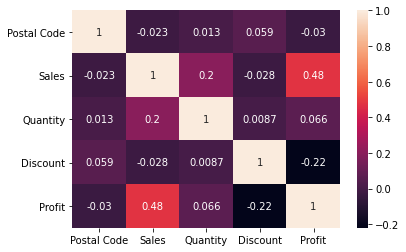

In [ ]:
#Correlation between heat map visualisations
sns.heatmap(corr, annot = True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


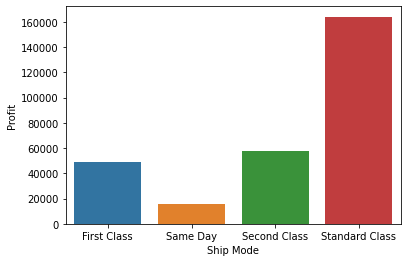

In [ ]:
#Visualising data between Profit and Class

pc = df.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
sns.barplot(pc['Ship Mode'], pc['Profit'])

Standard class has more profit.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


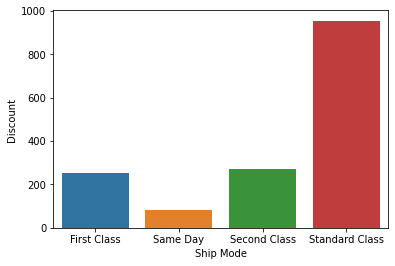

In [ ]:
dc = df.groupby(['Ship Mode'], as_index = False)['Discount'].sum()
sns.barplot(dc['Ship Mode'], dc['Discount'])


As per the above two visualizations whichever gives more discount earns more profit.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


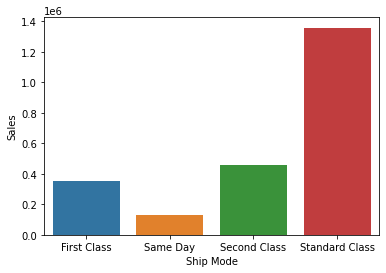

In [ ]:
dc = df.groupby(['Ship Mode'], as_index = False)['Sales'].sum()
sns.barplot(dc['Ship Mode'], dc['Sales'])

**plotting between category and profit**

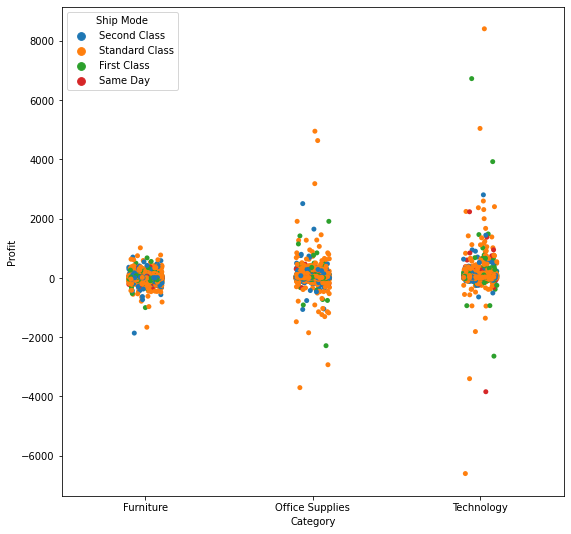

In [ ]:
plt.figure(figsize = (9, 9))
sns.stripplot(x='Category',y='Profit',data=df ,hue='Ship Mode')

technology category has the highest profit so that sales need to be more.

In [ ]:
s = df.groupby(['Segment'],as_index = False).sum()
s

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
1,Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
2,Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


In [ ]:
sns.barplot(x = 'Segment', y = 'Quantity', data = s

SyntaxError: ignored

consumers purchases more good quantity so this are the customers that should be more targeted to earn more profit

In [ ]:
df.groupby(['Region'], as_index = False, sort = True)['Profit'].mean()

,Region,Profit
0,Central,17.100421
1,East,32.163905
2,South,28.857673
3,West,33.927281


**Pie charts**

Text(0.5, 1.0, 'Average profit for Different regions')

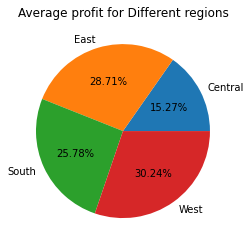

In [ ]:

region = ['Central', 'East', 'South', 'West']
profit = [17.093, 32.135, 28.858, 33.849]
plt.pie(profit, labels = region, autopct='%1.2f%%')
plt.title('Average profit for Different regions')

west side has the more profit

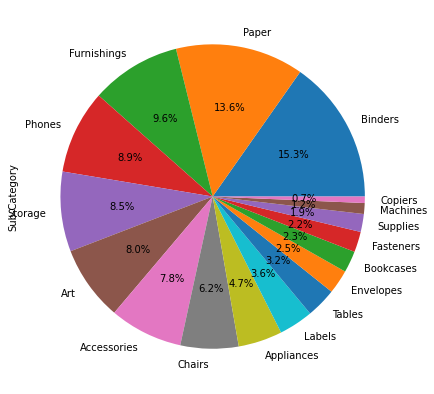

In [ ]:
plt.figure(figsize = (7, 7))
df['Sub-Category'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
plt.show()

Binders,Paper and Furnishing are the materials which are sold more while copiers,Machines and Supplies are the least sold material.

In [ ]:
s = df.groupby(by = ['Segment','Category'], as_index = False)['Sales'].sum()
s


,Segment,Category,Sales
0,Consumer,Furniture,390659.3420
1,Consumer,Office Supplies,363773.5360
2,Consumer,Technology,406399.8970
3,Corporate,Furniture,229019.7858
4,Corporate,Office Supplies,230600.2260
5,Corporate,Technology,246450.1190
6,Home Office,Furniture,121627.1855
7,Home Office,Office Supplies,124361.4820
8,Home Office,Technology,183304.0170


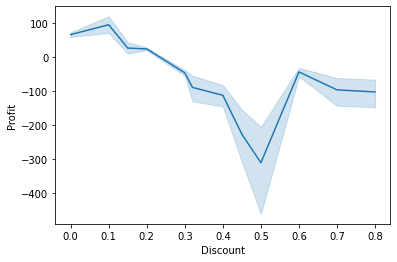

In [ ]:
sns.lineplot(y = 'Profit', x = 'Discount', data = df)

Profit and Discount has negative relations means if the discount is given more than the profit is less.

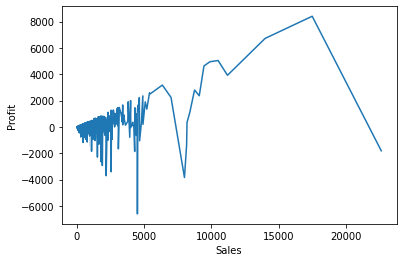

In [ ]:
sns.lineplot(y = 'Profit', x = 'Sales', data = df)

the sales and profit has positive relations more the sales more the profit.

In [ ]:
df.groupby(['City', 'State'], as_index = False, sort = True)['Profit'].sum().agg([np.min])

,City,State,Profit
amin,Aberdeen,Alabama,-13843.2106


The Aberdeen city in Alabama State is at huge loss.

In [ ]:
df.groupby(['City', 'State'], as_index = False, sort = True)['Profit'].sum().agg([np.max])

,City,State,Profit
amax,Yuma,Wyoming,62013.8973


The Yuma city in Wyoming State is earning more profit.

In [ ]:
sp = df.groupby(['State'], as_index = False, sort = True)['Profit'].sum()
sp.sort_values(by = ['Profit']).head()

,State,Profit
41,Texas,-25750.9833
33,Ohio,-16959.3178
36,Pennsylvania,-15565.4035
11,Illinois,-12601.6500
31,North Carolina,-7490.9122


These are the top 5 states which are running at huge loss

**Overall scenerio shows large cities, like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit. And in case of Categories, Technology is always leading in terms of Sales and Profit. Some useful insights are shown like, some cities are there, where company is giving huge discounts but very less sales and profit is generating. Also there are cities, where discounts are totaly '0', but they are generating high profits. Hence great focus are to be given in those cases. If above mentioned points are taken care of, surely some improvements can be done.**